w[0]: 0.393906  b: -0.031804


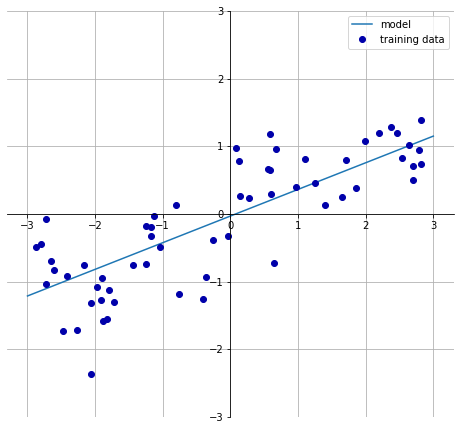

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [12]:
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [14]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.67
Test set score: 0.66


In [15]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [18]:
print(f"training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

training set score: 0.95
Test set score: 0.61


RIDGE REGRESSION

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.89
Test set score: 0.75


In [32]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Training set score: {ridge10.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge10.score(X_test, y_test):.2f}")

Training set score: 0.79
Test set score: 0.64


In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"Training set score: {ridge01.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test, y_test):.2f}")

Training set score: 0.93
Test set score: 0.77


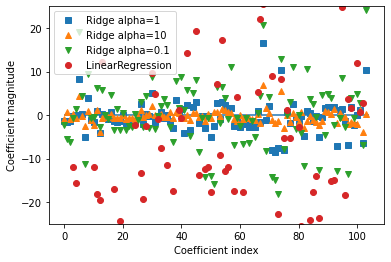

In [35]:
from matplotlib import pyplot as plt
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

C:\Python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python38\lib\site-packages\sklearn\linear_model\_base.py", line 569, in fit
    linalg.lstsq(X, y)
  File "C:\Python38\lib\site-packages\scipy\linalg\basic.py", line 1207, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"


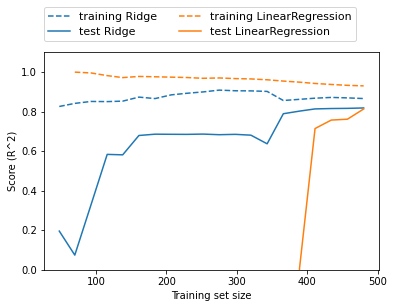

In [37]:
mglearn.plots.plot_ridge_n_samples()

In [41]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [42]:
lasso001 = Lasso(alpha=0.01, max_iter= 100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train,y_train):.2f}")
print(f"Test set score: {lasso001.score(X_test,y_test):.2f}")
print(f"Number of features used {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.90
Test set score: 0.77
Number of features used 33


In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

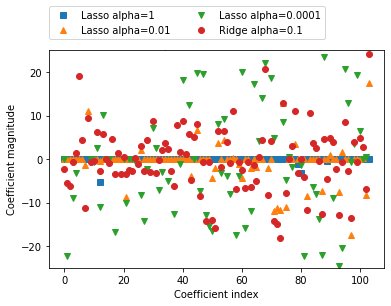

In [44]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


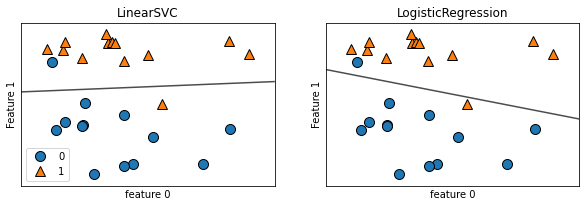

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [51]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [53]:
logreg100 = LogisticRegression(C=100,max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.972


In [56]:
logreg001 = LogisticRegression(C=0.01,max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


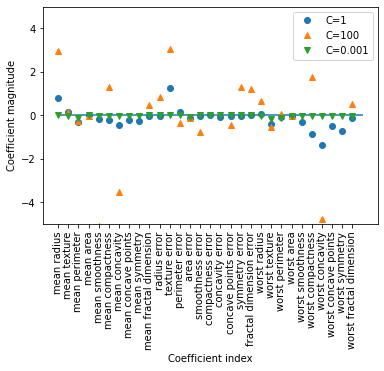

In [57]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.00: 0.91
Test accuracy of l1 logreg with C=0.00: 0.92
Training accuracy of l1 logreg with C=1.00: 0.96
Test accuracy of l1 logreg with C=1.00: 0.96
Training accuracy of l1 logreg with C=100.00: 0.99
Test accuracy of l1 logreg with C=100.00: 0.98


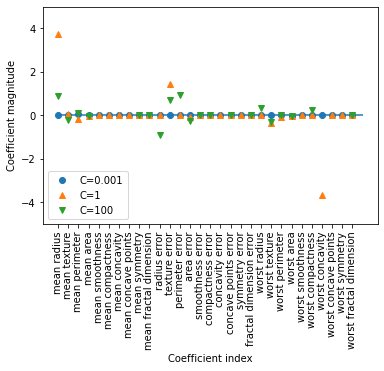

In [66]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1",max_iter=10000,solver='liblinear').fit(X_train, y_train)
    print(f"Training accuracy of l1 logreg with C={C:.2f}: {lr_l1.score(X_train, y_train):.2f}")
    print(f"Test accuracy of l1 logreg with C={C:.2f}: {lr_l1.score(X_test,y_test):.2f}")
    plt.plot(lr_l1.coef_.T, marker,label=f"C={C}")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

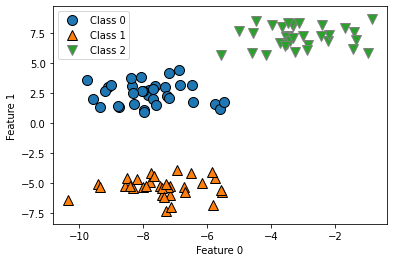

In [68]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=43)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [69]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


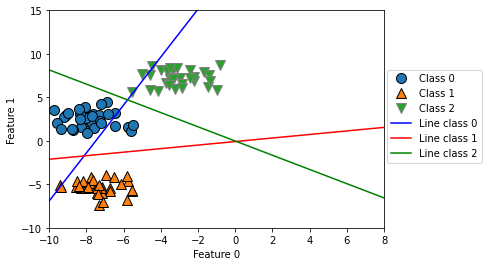

In [71]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))   

Text(0, 0.5, 'Feature 1')

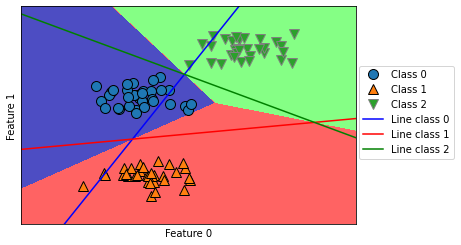

In [73]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Naive bayes classifiers

In [74]:
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [75]:
counts = {}
for label in np.unique(y):
# iterate over each class
# count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts)) 

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
